<a href="https://colab.research.google.com/github/SonakshiA/Student-Marks-Prediction/blob/main/Linear_Regression_Student_Marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
import numpy as np
import pandas as pd

In [4]:
dataset = 'https://www.kaggle.com/datasets/yasserh/student-marks-dataset'
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sonakshiarora02
Your Kaggle Key: ··········


100%|██████████| 949/949 [00:00<00:00, 495kB/s]

In [5]:
data = pd.read_csv('Student_Marks.csv')
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [6]:
data.drop(columns=['number_courses'],inplace=True)
data.head()

,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


In [7]:
Y=data['Marks']
X=data[['time_study']]

In [27]:
Z = data['time_study']
print(X)
print(Z)

    time_study
0        4.508
1        0.096
2        3.133
3        7.909
4        7.811
..         ...
95       3.561
96       0.301
97       7.163
98       0.309
99       6.335

[100 rows x 1 columns]
0     4.508
1     0.096
2     3.133
3     7.909
4     7.811
      ...  
95    3.561
96    0.301
97    7.163
98    0.309
99    6.335
Name: time_study, Length: 100, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [9]:
print(X.shape, x_train.shape, x_test.shape)

(100, 1) (70, 1) (30, 1)


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
print("Intercept (c): ", lr.intercept_)
print("Slope (m): ", lr.coef_)

Intercept (c):  0.3753651428442062
Slope (m):  [5.8542316]


**Once we have fitted (trained) the model, we can make predictions using the predict() function. We pass the values of x_test to this method and compare the predicted values called y_pred_slr with y_test values to check how accurate our predicted values are.**

In [13]:
y_pred = lr.predict(x_test)
pred_values = pd.DataFrame({'Actual value' : y_test , 'Predicted value': y_pred})
pred_values.head()

,Actual value,Predicted value
37,46.453,43.011734
62,19.590,21.485724
26,12.647,3.349315
41,15.725,16.497919
35,43.978,44.533834


In [14]:
import matplotlib.pyplot as plt

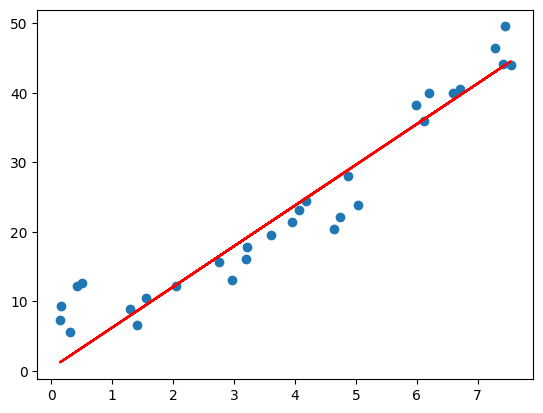

In [15]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,'Red')
plt.show()

In [23]:
from sklearn import metrics

r2 = metrics.r2_score(y_test, y_pred)
print('R2 score for perfect model is', r2*100)

meanSqError = metrics.mean_squared_error(y_test,y_pred)
print('The MSE is ',meanSqError)

meanAbsError = metrics.mean_absolute_error(y_test,y_pred)
print('The MAE is ',meanAbsError)

R2 score for perfect model is 90.34331122430488
The MSE is  17.35327255955165
The MAE is  3.1194197467043483
